In [ ]:
! pip install pandas 
! pip install numpy 
! pip install plotly.express
! pip install datetime
! pip install seaborn
! pip install scikit-learn scipy matplotlib 

In [ ]:
! pip install requests
! pip install xgboost

In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob

In [2]:
df1=pd.read_csv(r"D:\all capstone\Singapore Flat Resale\1990To1999.csv")
df2=pd.read_csv(r"D:\all capstone\Singapore Flat Resale\2000FebTo2012.csv")
df3=pd.read_csv(r"D:\all capstone\Singapore Flat Resale\Mar2012toDec2014.csv")
df4=pd.read_csv(r"D:\all capstone\Singapore Flat Resale\Jan2015toDec2016.csv")
df5=pd.read_csv(r"D:\all capstone\Singapore Flat Resale\Jan2017onwards.csv")

df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
920884,2024-03,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,Improved,1987,680000.0,62 years 08 months
920885,2024-03,YISHUN,5 ROOM,607,YISHUN ST 61,01 TO 03,121.0,Improved,1987,613000.0,62 years 07 months
920886,2024-03,YISHUN,5 ROOM,841,YISHUN ST 81,07 TO 09,122.0,Improved,1988,745000.0,62 years 11 months
920887,2024-03,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0,62 years 07 months


In [3]:
df.shape

(920889, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920889 entries, 0 to 920888
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                920889 non-null  object 
 1   town                 920889 non-null  object 
 2   flat_type            920889 non-null  object 
 3   block                920889 non-null  object 
 4   street_name          920889 non-null  object 
 5   storey_range         920889 non-null  object 
 6   floor_area_sqm       920889 non-null  float64
 7   flat_model           920889 non-null  object 
 8   lease_commence_date  920889 non-null  int64  
 9   resale_price         920889 non-null  float64
 10  remaining_lease      211839 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.3+ MB


In [5]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,920889.0,95.694690,25.837047,28.0,73.0,93.0,113.0,307.0
lease_commence_date,920889.0,1988.208925,10.593126,1966.0,1981.0,1986.0,1996.0,2022.0
resale_price,920889.0,318864.314410,168782.674417,5000.0,192000.0,295000.0,415000.0,1568888.0


In [7]:
df['resale_price'].value_counts()

resale_price
300000.0     6905
350000.0     6805
280000.0     6544
320000.0     6511
250000.0     6283
             ... 
102080.0        1
143450.0        1
269001.0        1
400998.0        1
1056500.0       1
Name: count, Length: 9420, dtype: int64

Data Cleaning

In [8]:
df.nunique()

month                   411
town                     27
flat_type                 8
block                  2706
street_name             584
storey_range             25
floor_area_sqm          211
flat_model               34
lease_commence_date      56
resale_price           9420
remaining_lease         723
dtype: int64

In [9]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

REMAINING_LEASE

In [10]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [11]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [12]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
920884,2024-03,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,Improved,1987,680000.0,62.666667
920885,2024-03,YISHUN,5 ROOM,607,YISHUN ST 61,01 TO 03,121.0,Improved,1987,613000.0,62.583333
920886,2024-03,YISHUN,5 ROOM,841,YISHUN ST 81,07 TO 09,122.0,Improved,1988,745000.0,62.916667
920887,2024-03,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0,62.583333
920888,2024-03,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,780000.0,62.833333


In [13]:
df['remaining_lease'].value_counts()

remaining_lease
68.000000    711639
95.000000      2329
67.000000      2209
69.000000      1911
71.000000      1753
              ...  
97.750000         1
97.583333         1
97.250000         1
41.750000         1
96.833333         1
Name: count, Length: 670, dtype: int64

In [14]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

Wrong Format

In [15]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [16]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [17]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
920887,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0,62.583333,2024,03,10,12
920888,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,780000.0,62.833333,2024,03,7,9


In [18]:
df.drop('storey_range', axis = 1, inplace= True)

In [19]:
# CONVERTING

df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [20]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,4,6


In [21]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

TEXT ERRORS

In [22]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [23]:
df['town'].value_counts()

town
TAMPINES           79507
YISHUN             69651
BEDOK              66336
JURONG WEST        66245
WOODLANDS          65097
ANG MO KIO         51852
HOUGANG            50411
BUKIT BATOK        44003
CHOA CHU KANG      38015
BUKIT MERAH        34113
PASIR RIS          33071
SENGKANG           32040
TOA PAYOH          31367
QUEENSTOWN         28624
GEYLANG            28043
CLEMENTI           27916
BUKIT PANJANG      27510
KALLANG/WHAMPOA    26974
JURONG EAST        24649
SERANGOON          22729
BISHAN             21183
PUNGGOL            20222
SEMBAWANG          13650
MARINE PARADE       8006
CENTRAL AREA        7104
BUKIT TIMAH         2507
LIM CHU KANG          64
Name: count, dtype: int64

In [24]:
df['flat_type'].value_counts()

flat_type
4 ROOM              349703
3 ROOM              294412
5 ROOM              193996
EXECUTIVE            69282
2 ROOM               11654
1 ROOM                1300
MULTI GENERATION       279
MULTI-GENERATION       263
Name: count, dtype: int64

In [25]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [26]:
df['flat_type'].value_counts()

flat_type
4 ROOM              349703
3 ROOM              294412
5 ROOM              193996
EXECUTIVE            69282
2 ROOM               11654
1 ROOM                1300
MULTI GENERATION       542
Name: count, dtype: int64

In [27]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17529
BEDOK RESERVOIR RD    14672
ANG MO KIO AVE 10     13762
ANG MO KIO AVE 3      12109
HOUGANG AVE 8          9323
                      ...  
GEYLANG EAST AVE 2       15
SEMBAWANG WAY            14
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [28]:
df['flat_model'].value_counts()

flat_model
Model A                   192271
Improved                  166742
New Generation            109362
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          46158
Simplified                 34069
Apartment                  25381
Standard                   25015
SIMPLIFIED                 23258
STANDARD                   17375
Maisonette                 17304
MAISONETTE                 12215
Model A2                   10073
APARTMENT                   9901
DBSS                        3242
Adjoined flat               1240
Model A-Maisonette          1085
MODEL A-MAISONETTE           982
Terrace                      443
Type S1                      431
MULTI GENERATION             279
Multi Generation             263
TERRACE                      247
Type S2                      214
Premium Apartment Loft       107
2-room                        98
Premium Maisonette            86
Improved-Maisonette           81

In [29]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [30]:
df['flat_model'].value_counts()

flat_model
Model A                   262652
Improved                  240331
New Generation            188260
Simplified                 57327
Premium Apartment          46164
Standard                   42390
Apartment                  35282
Maisonette                 29519
Model A2                   10073
DBSS                        3242
Model A-Maisonette          2067
Adjoined flat               1240
Terrace                      690
Multi Generation             542
Type S1                      431
Type S2                      214
Improved-Maisonette          125
2-room                       119
Premium Apartment Loft       107
Premium Maisonette            86
3Gen                          28
Name: count, dtype: int64

Duplicate

In [31]:
df.duplicated().sum()

2333

In [32]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

OUTLIERS

In [33]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [34]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

Visualize using Boxplot

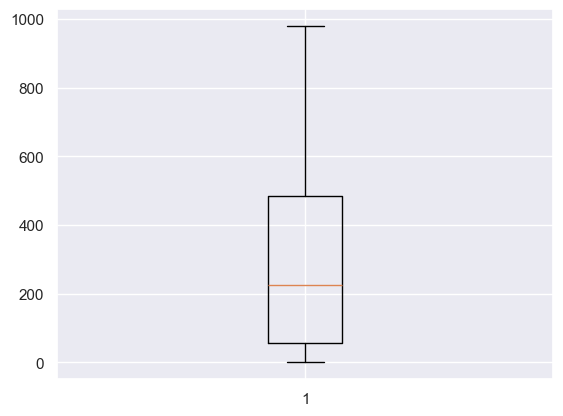

In [35]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

In [36]:
        # IQR

Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-585.0, 1127.0)

In [37]:
df.block = df.block.clip(lower_bound , upper_bound)

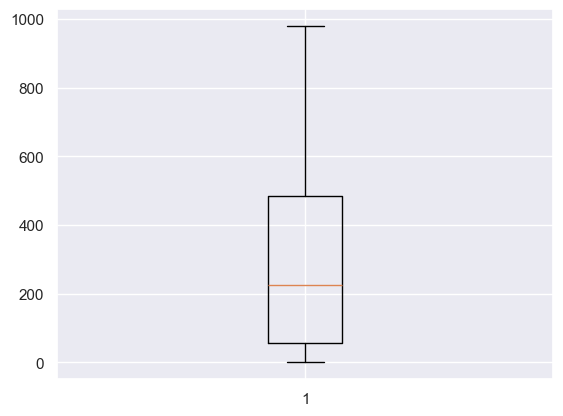

In [38]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

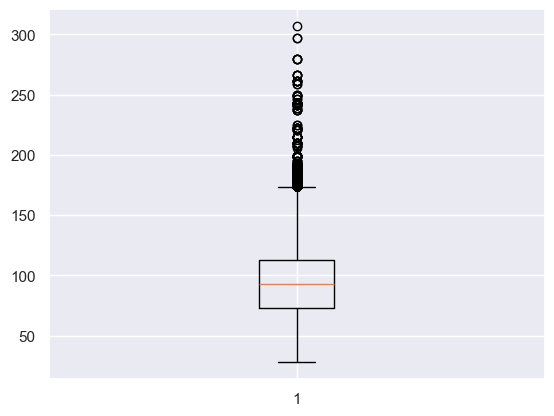

In [39]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

In [40]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(13.0, 173.0)

In [41]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound , upper_bound)

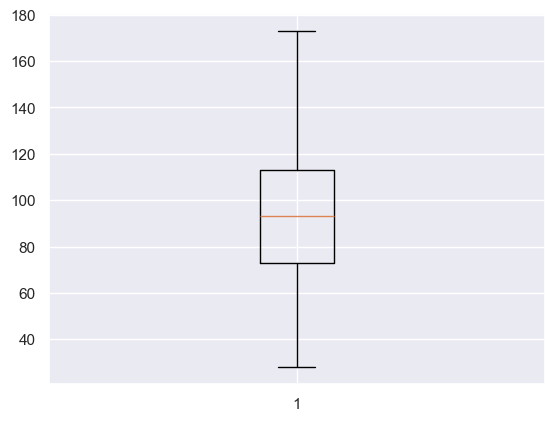

In [42]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

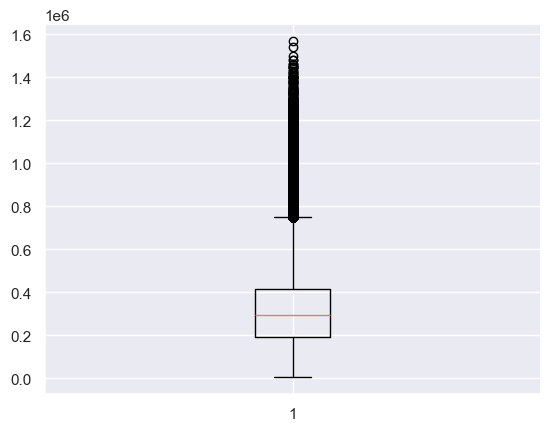

In [43]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()


In [44]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-141250.0, 748750.0)

In [45]:
df.resale_price = df.resale_price.clip(lower_bound , upper_bound)

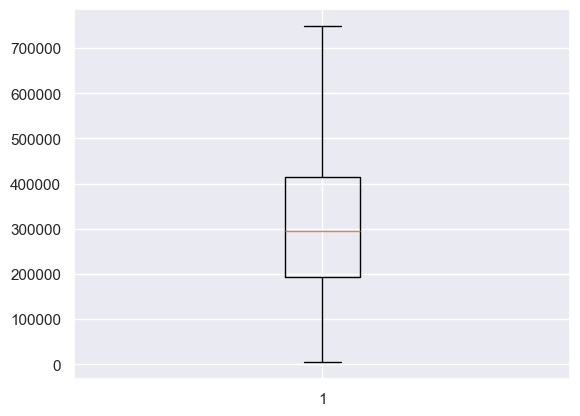

In [46]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

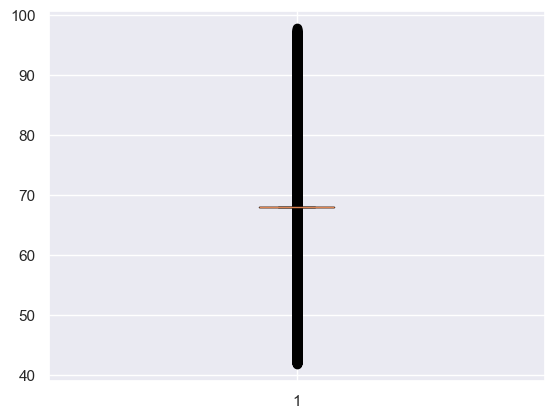

In [47]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

In [48]:
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(68.0, 68.0)

In [49]:
df.remaining_lease = df.remaining_lease.clip(lower_bound , upper_bound)

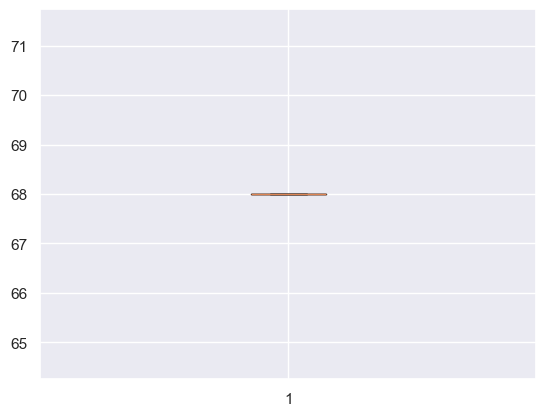

In [50]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()


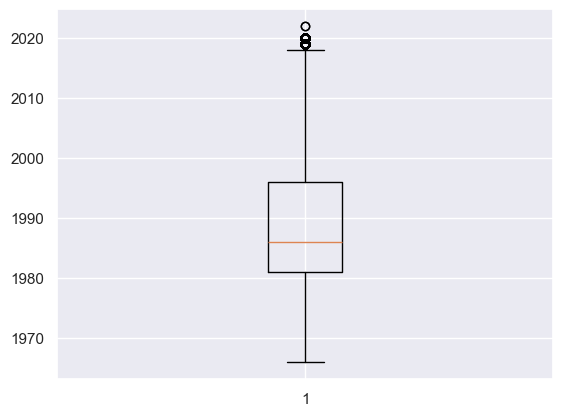

In [51]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()


In [52]:
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(1958.5, 2018.5)

In [53]:
df.lease_commence_date = df.lease_commence_date.clip(lower_bound , upper_bound)

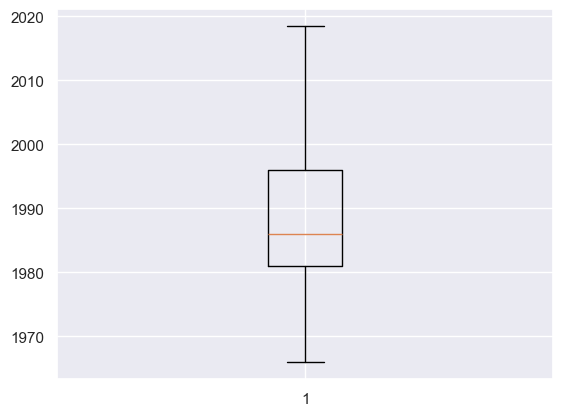

In [54]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()


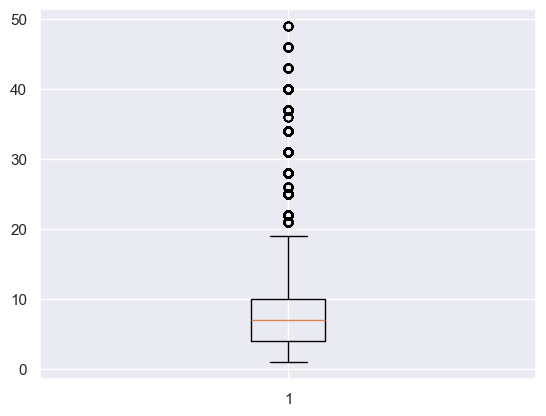

In [55]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()


In [56]:
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-5.0, 19.0)

In [57]:
df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound , upper_bound)

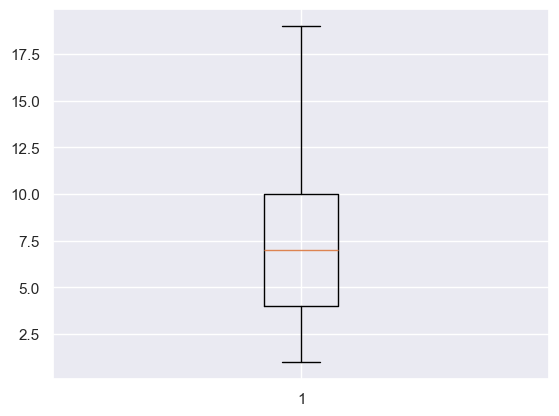

In [58]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

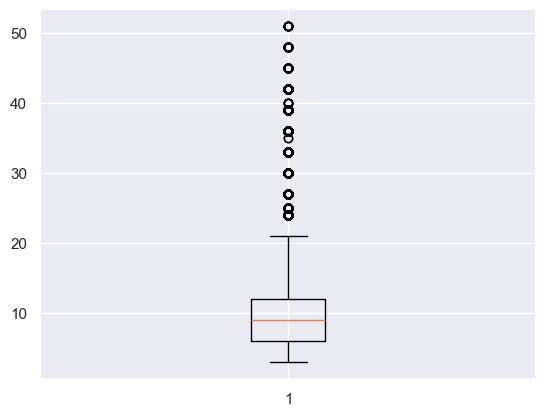

In [59]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [60]:
Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-3.0, 21.0)

In [61]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound , upper_bound)

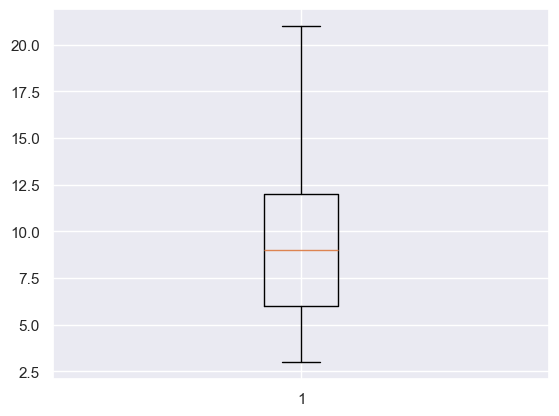

In [62]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

EDA - EXPLORATARY DATA ANALYSIS
Categorical Vs Frequency using BarPlot

In [63]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

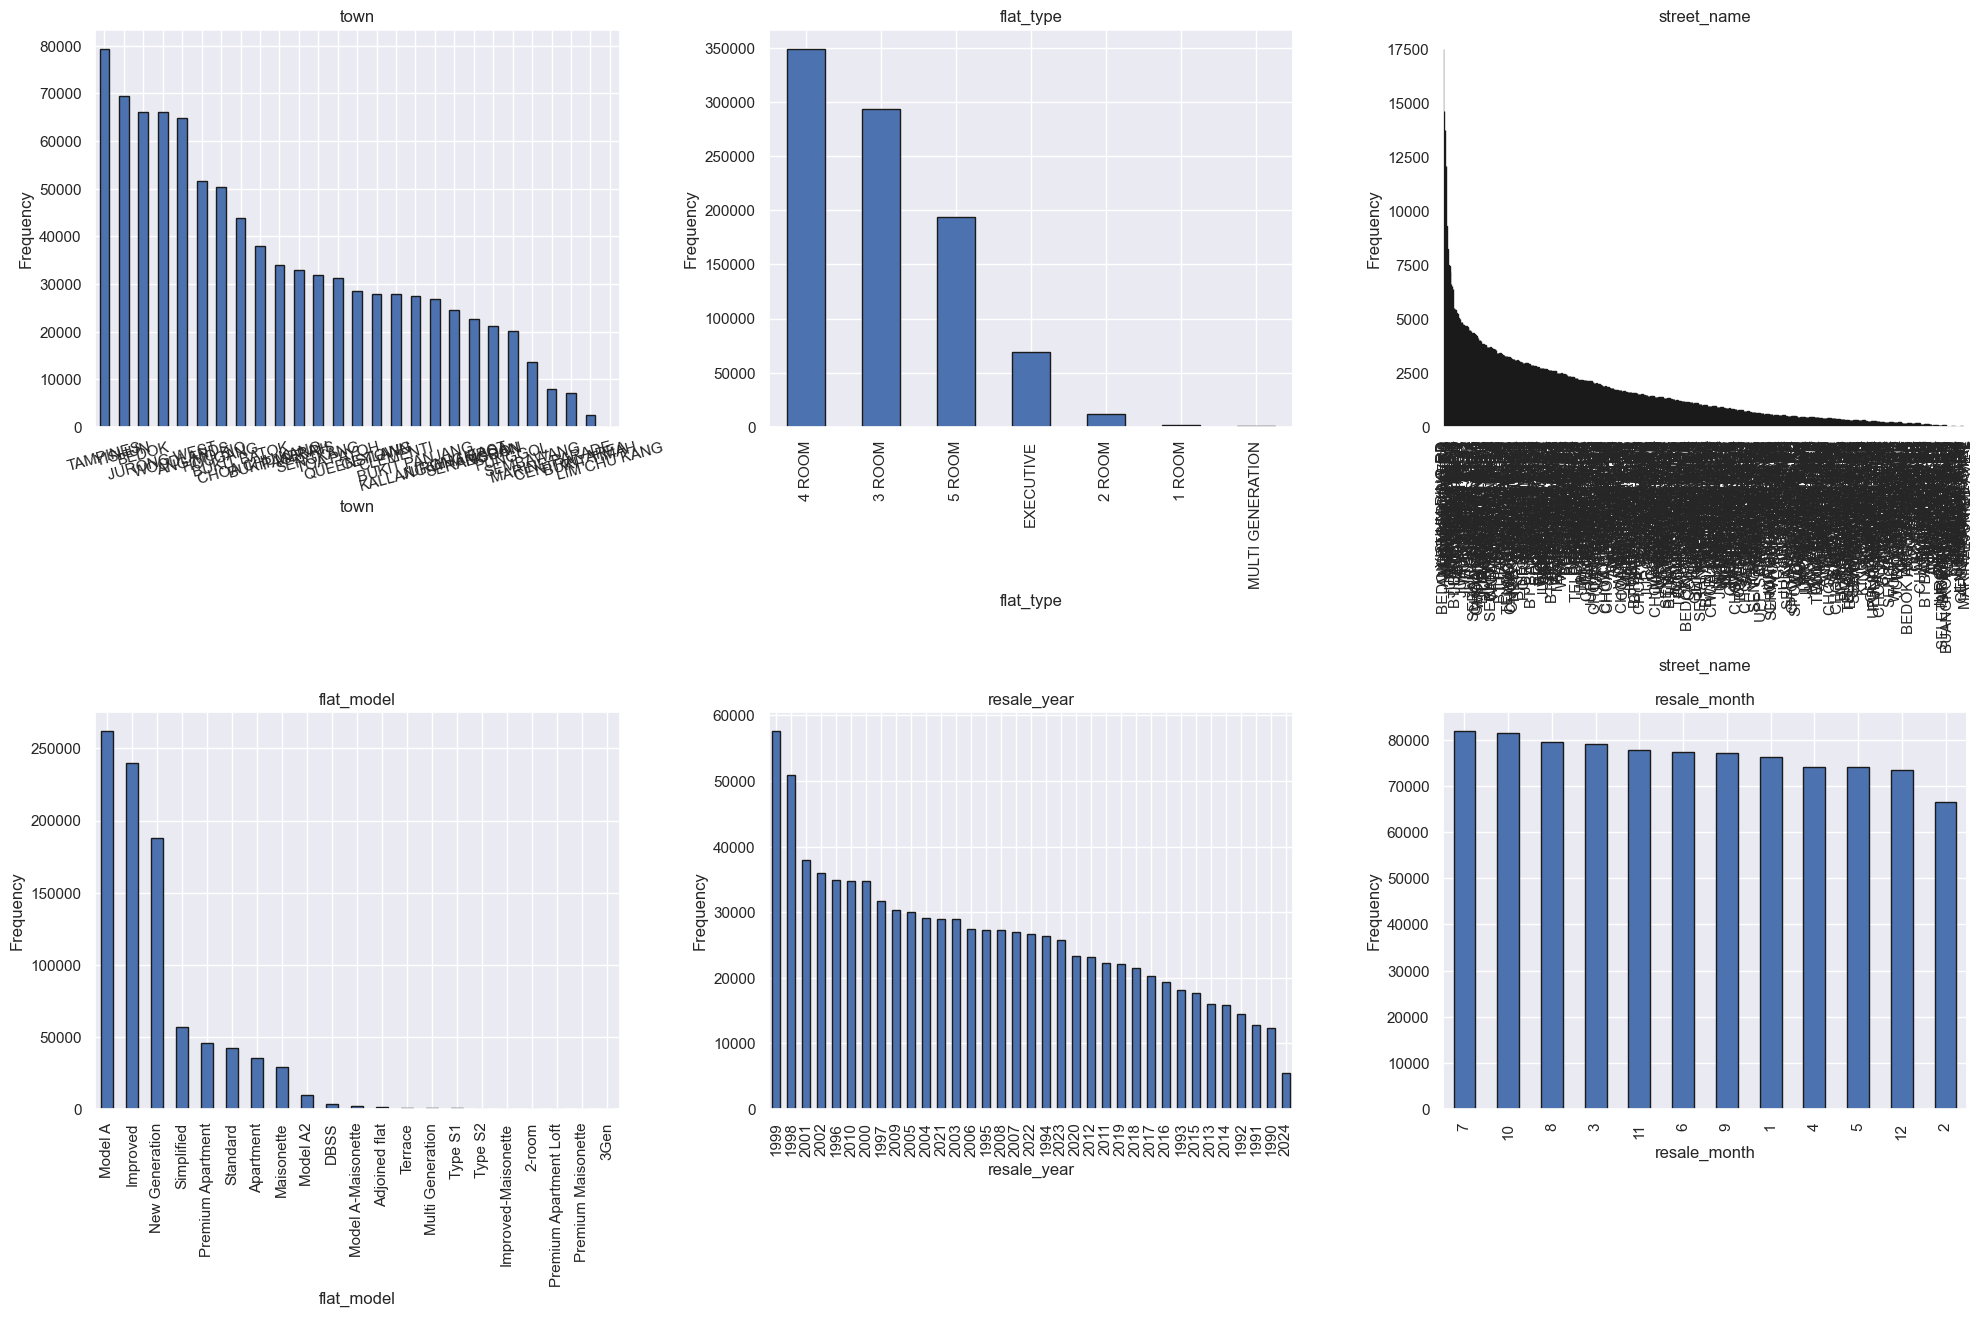

In [64]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Feature Vs Target (Categorical Data )

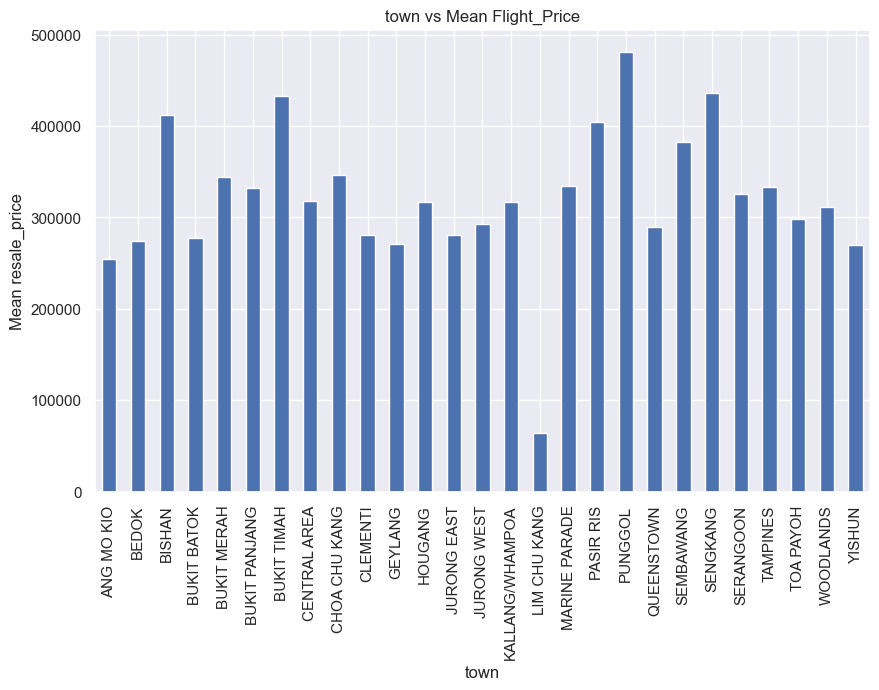

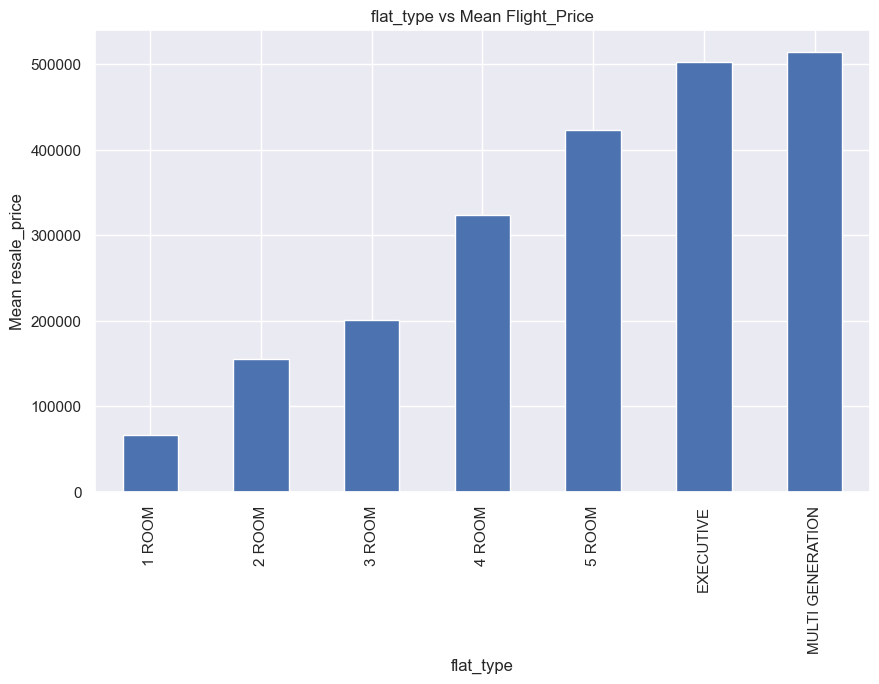

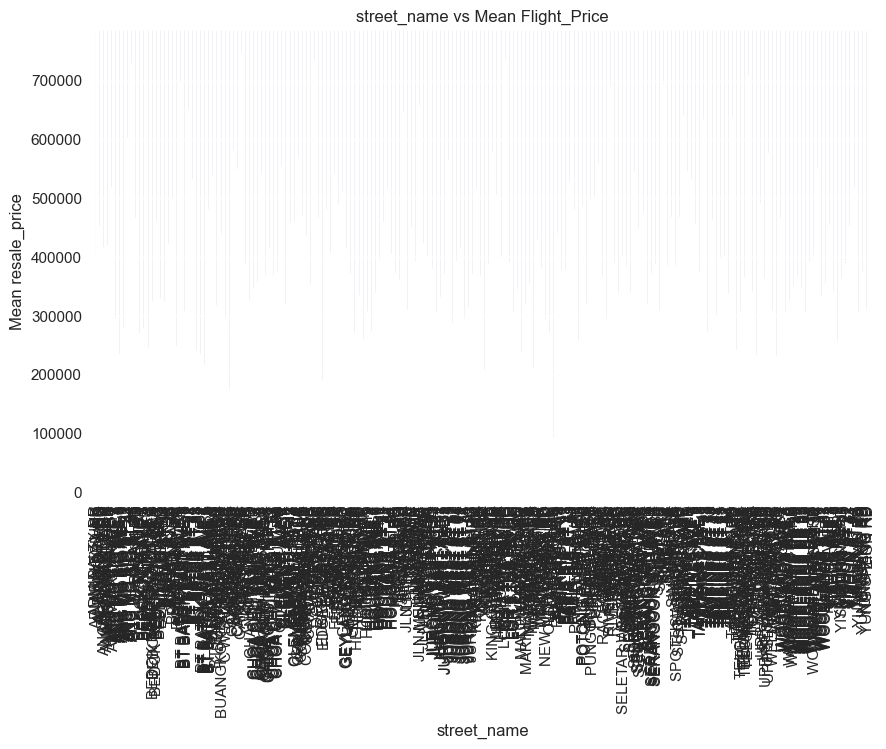

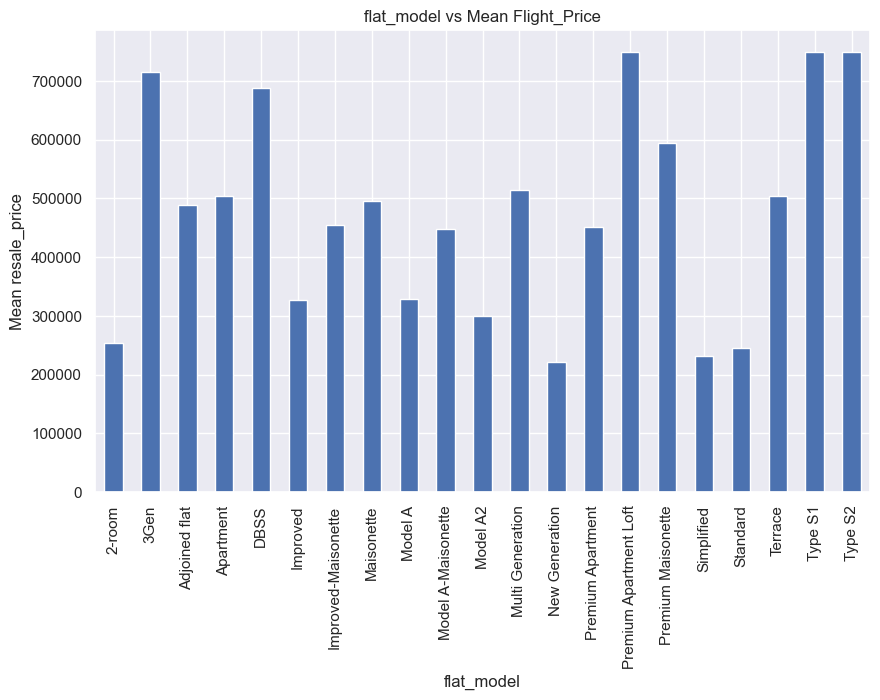

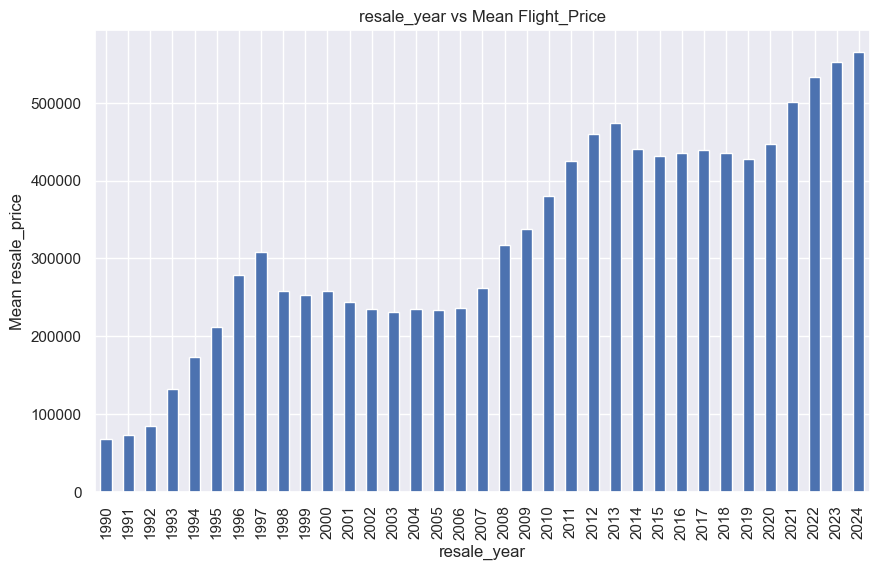

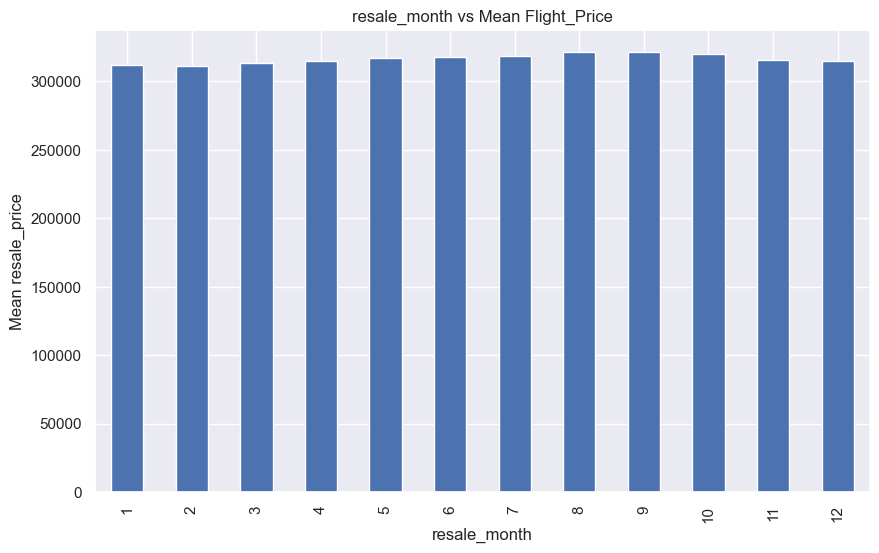

In [65]:
# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flight_Price')
    plt.show()

Feature Vs Target (Continuous Data )

In [66]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [67]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

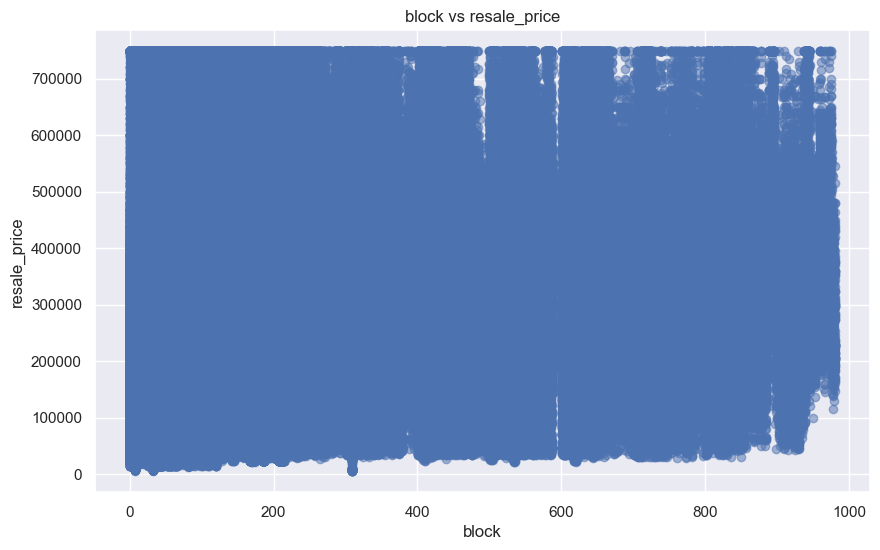

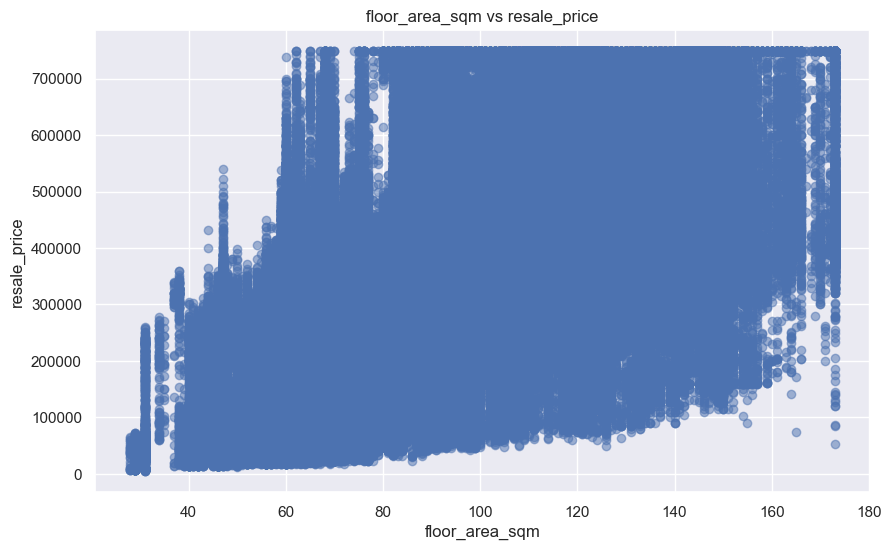

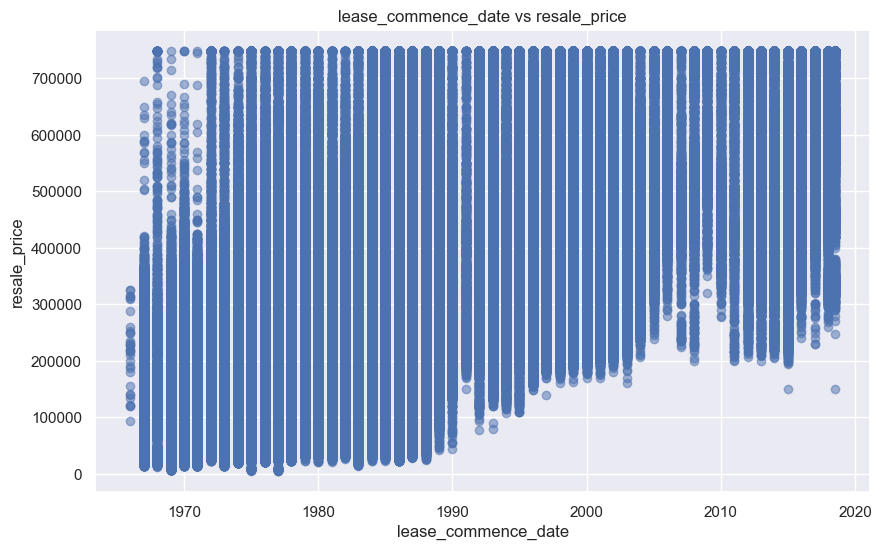

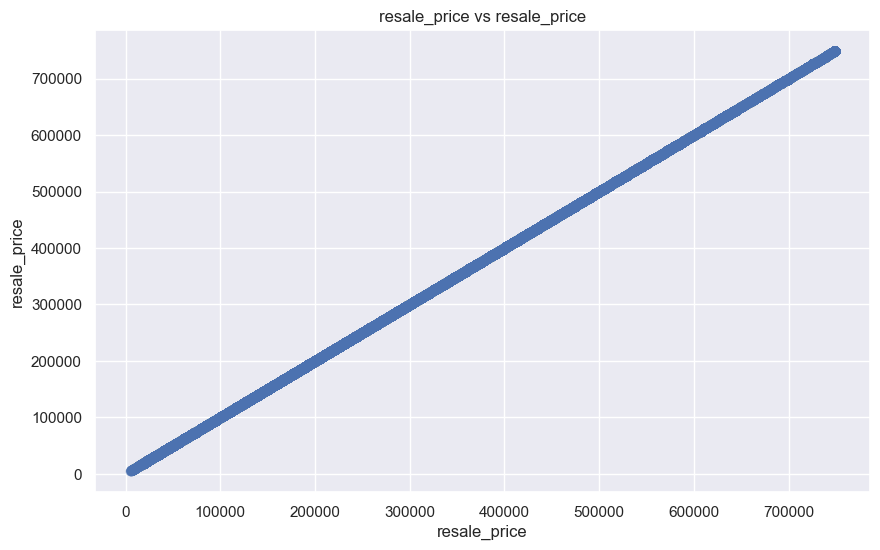

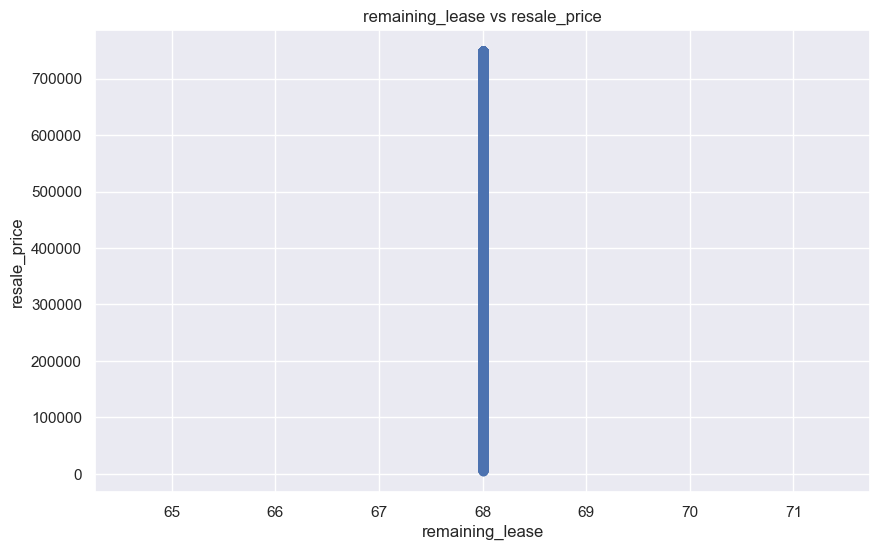

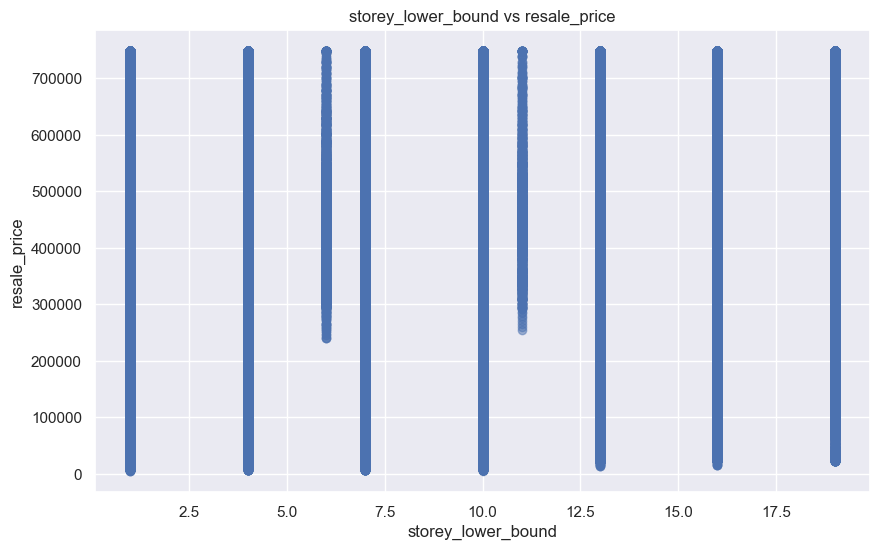

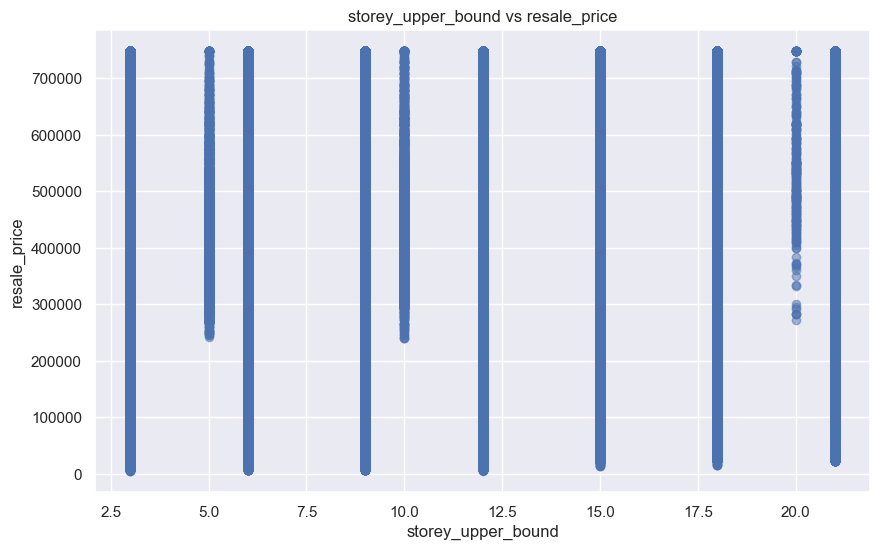

In [68]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound', 
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

Encoding Categorical Variables

In [69]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols


['town', 'flat_type', 'street_name', 'flat_model']

In [70]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [71]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [72]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [73]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [74]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [75]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12


In [76]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9


In [ ]:
# save the processed data for the deployment
df1.to_csv('final.csv')

CORRELATION

In [77]:
# correlation matrix (ranges from 1 to -1)
corrm=df1.corr()
#corrm.to_csv('corrm.csv')
corrm


,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.208812,0.051362,0.587725,0.201726,0.163486,0.334447,0.123607,NaN,0.124487,0.004543,-0.019340,-0.019072
flat_type,0.208812,1.000000,0.127883,0.388377,0.954842,0.243264,0.413173,0.604840,NaN,0.102223,0.003595,0.077984,0.078319
block,0.051362,0.127883,1.000000,0.049721,0.187547,-0.002036,0.010708,-0.079448,NaN,-0.113751,0.000777,-0.123886,-0.123931
street_name,0.587725,0.388377,0.049721,1.000000,0.357559,0.354240,0.739558,0.379064,NaN,0.317420,0.008245,0.080849,0.081505
floor_area_sqm,0.201726,0.954842,0.187547,0.357559,1.000000,0.201093,0.391847,0.579779,NaN,0.064113,0.002776,0.044307,0.044496
flat_model,0.163486,0.243264,-0.002036,0.354240,0.201093,1.000000,0.357393,0.246434,NaN,0.163117,0.002351,0.019273,0.019639
lease_commence_date,0.334447,0.413173,0.010708,0.739558,0.391847,0.357393,1.000000,0.541455,NaN,0.428320,0.007737,0.151847,0.152276
resale_price,0.123607,0.604840,-0.079448,0.379064,0.579779,0.246434,0.541455,1.000000,NaN,0.678429,0.012546,0.209043,0.211792
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.124487,0.102223,-0.113751,0.317420,0.064113,0.163117,0.428320,0.678429,NaN,1.000000,-0.017295,0.095758,0.097889


Visualize using Heatmap

<Axes: >

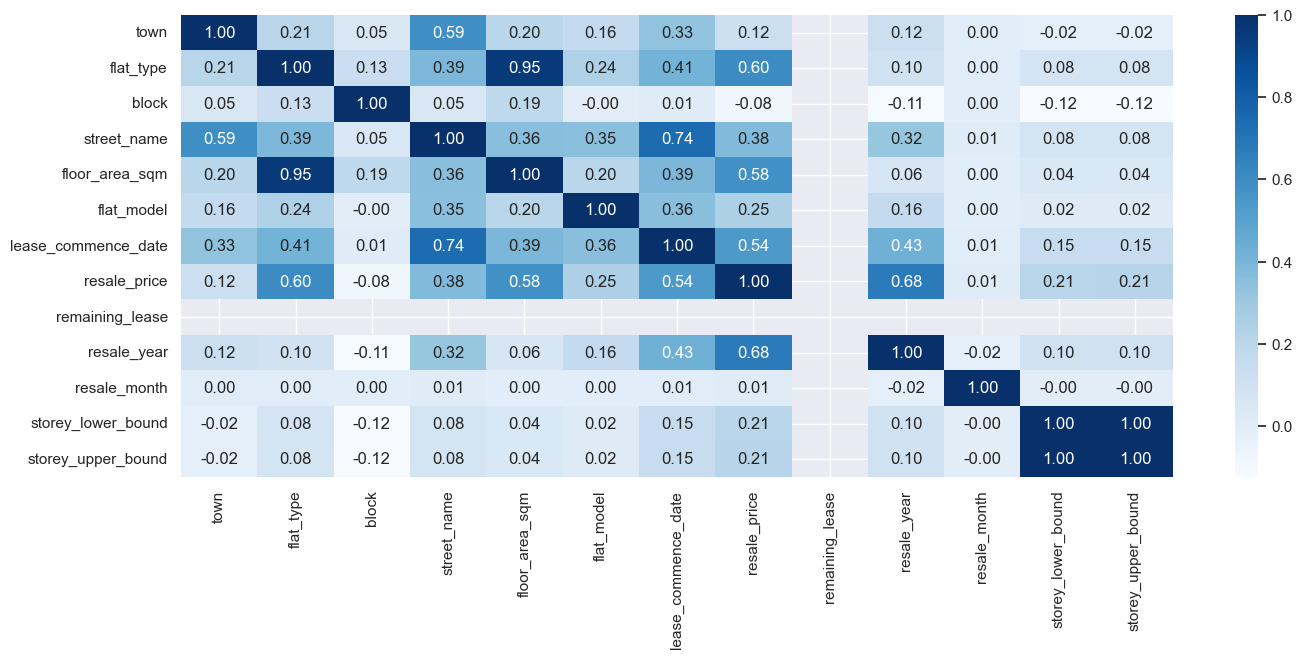

In [78]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

RIGHT TO MEACHIN LEARNING

SPLIT

In [79]:
# assign feature and target variable
X = df1.drop('resale_price', axis= 1)
y = df1['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [80]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(734844, 12) (183712, 12) (734844,) (183712,)


SCALING

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[-1.49515712, -1.06935911, -0.84765384, ...,  0.12602352,
         -0.57910107, -0.58252159],
        [-0.59728533, -1.06935911,  0.53498308, ...,  0.41842311,
          0.77019669,  0.76707617],
        [ 0.94192345, -0.01515931,  0.21122513, ...,  0.12602352,
          0.09554781,  0.09227729],
        ...,
        [ 1.45499305,  1.03904048, -0.19252009, ..., -0.16637607,
          1.44484557,  1.44187505],
        [ 0.30058646,  1.03904048, -1.07237995, ..., -1.04357483,
          1.44484557,  1.44187505],
        [-1.23862233, -0.01515931,  0.44356907, ...,  0.71082269,
         -0.57910107, -0.58252159]]),
 array([[ 0.94192345, -1.06935911, -0.34868569, ..., -1.33597441,
          0.77019669,  0.76707617],
        [ 0.94192345,  1.03904048,  0.81684295, ...,  0.12602352,
          0.09554781,  0.09227729],
        [-1.23862233,  1.03904048, -0.02873665, ...,  0.41842311,
          0.09554781,  0.09227729],
        ...,
        [ 1.45499305,  1.03904048,  0.50070283, ..., -

MODEL FITTING

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

1. LINEAR REGRESSION

In [83]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[231465.4577642  475640.52643054 643021.02004724 ... 553812.26087799
 200131.50151104 288604.73012105]
542795    155000.0
701900    440000.0
878740    670000.0
53124     280000.0
899413    585000.0
            ...   
650395    308000.0
675822    350000.0
793244    445000.0
44672     120000.0
291529    418000.0
Name: resale_price, Length: 183712, dtype: float64


In [84]:
linear_model.score(X_test, y_test)

0.7901152610752165

In [85]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.7897699413844862

2. KNN (K Nearest Neighbor) REGRESSION

In [86]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 28741.268344571938
Mean Squared Error (MSE)     : 1751310274.5457516
Root Mean Square Error (RMSE): 41848.65917261569
R-squared (R2) Score         : 0.9328240337496667


3. DECISION TREE REGRESSION

In [87]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17636.966308520576
Mean Squared Error (MSE)     : 684481610.9254733
Root Mean Square Error (RMSE): 26162.599468047385
R-squared (R2) Score         : 0.9737449644059047


4. RANDOM FOREST REGRESSION

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

Mean Absolute Error (MAE)    : 13852.044404524635
Mean Squared Error (MSE)     : 398946005.890668
Root Mean Square Error (RMSE): 19973.632766491628
R-squared (R2) Score         : 0.9846974098097107


5. XGBOOST REGRESSION

In [89]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
xgb_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", xgb_r2)

Mean Absolute Error (MAE)    : 16851.470440718876
Mean Squared Error (MSE)     : 554762992.6034575
Root Mean Square Error (RMSE): 23553.40723979139
R-squared (R2) Score         : 0.9787206524111041


Finalizing Models

In [ ]:
! pip install --upgrade nbformat

In [90]:
models = [ 'KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']
score = [r2_knn,r2_dt, rf_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.9328240337496667
DecisionTreeRegressor 0.9737449644059047
RandomForestRegressor 0.9846974098097107
XGBRegressor 0.9787206524111041

Model: RandomForestRegressor contain Maximum R2_Score: 0.9846974098097107 


SUGGESTION

In [91]:
rf_regressor.feature_importances_

array([0.04212682, 0.05077598, 0.01463112, 0.0232554 , 0.28405294,
       0.00770974, 0.03303147, 0.        , 0.52658367, 0.00658045,
       0.00445489, 0.00679753])

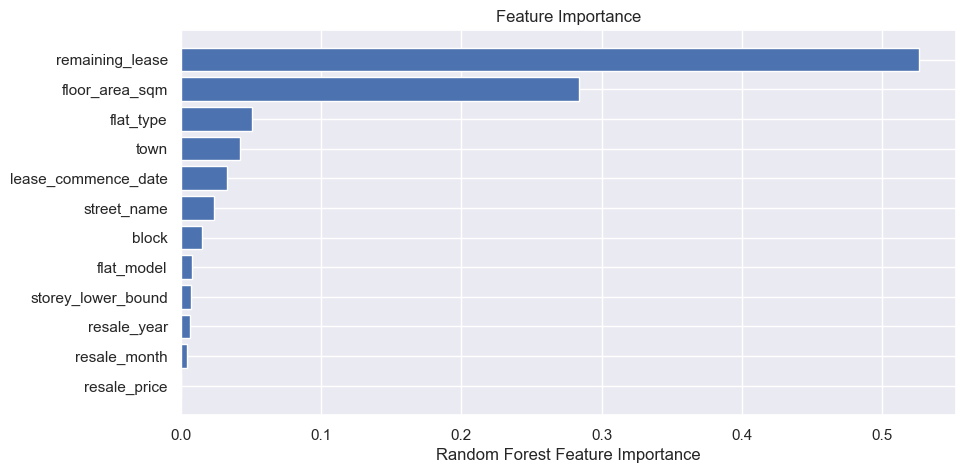

In [92]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()

SAVE THE MODEL

In [93]:
model=rf_regressor.fit(X_train, y_train)

In [94]:
model

RandomForestRegressor(random_state=42)

In [95]:
import pickle


# save the model to disk
filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Saved {filename} model to disk")

Saved RandomForestRegressor_model.pkl model to disk


PREDICTION

In [96]:
# get sample to predict the resale price
pre_df =df1.sample(n=5)
pre_df
     

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
689102,19,5,718.0,408,119.0,14,1997.0,605000.0,68.0,2013,9,13,15
668347,25,4,175.0,437,104.0,16,1997.0,533000.0,68.0,2012,8,19,21
87813,22,3,397.0,245,73.0,16,1989.0,101000.0,68.0,1995,2,4,6
144406,4,3,235.0,34,69.0,15,1985.0,185000.0,68.0,1996,12,4,6
5106,13,4,455.0,138,107.0,16,1985.0,90000.0,68.0,1990,5,4,6


In [97]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

In [98]:
# Make predictions on the sample
pre_pred = rf_regressor.predict(A)
pre_pred

array([579092.16, 534250.  , 101540.  , 179095.  ,  89677.  ])

In [ ]:
#https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fpredicting-singapore-hdb-resale-price-eda-and-modeling-94af7d26798d&psig=AOvVaw2bKZctZEULaKnYG2QV3RDl&ust=1711084369440000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCNDN9_jLhIUDFQAAAAAdAAAAABAE